# Elecciones USA 2020

## Datasets

### Cargar características socioeconómicas y demográficas

In [43]:
from tabulate import tabulate
import pandas as pd

# Cargar datos
all_data = pd.read_csv("data/county_complete.csv", header=0, sep=",")

# Seleccionar las primeras tres columnas y las columnas que contienen "2019"
all_data = all_data.iloc[:, [0, 1, 2]].join(all_data.loc[:, all_data.columns.str.contains("2019")])

# Renombrar la tercera columna
all_data.columns.values[2] = "county"

# Usar tabulate para mostrar las primeras 5 filas en formato de tabla
print(tabulate(all_data.head(), headers='keys', tablefmt='fancy_grid'))
print(len(all_data))

╒════╤════════╤═════════╤════════════════╤════════════════════╤════════════════════╤════════════════════╤════════════════════╤══════════════╤════════════════════════╤══════════════════╤══════════════╤═════════════════╤════════════════════════════════╤═══════════════════════════════╤═════════════════════════════════╤═══════════════════╤══════════════════════════════════════════╤═════════════════════════════════════════╤═══════════════════════════════╤══════════════════════════════════════════════╤═════════════════════════════════╤═════════════════════════════╤════════════════════════════════════╤════════════════════════════════════╤════════════════╤══════════════════════════════╤═════════════════════════╤═══════════════════╤════════════════════════════════╤═════════════════════════════════╤════════════════════════════════════════════╤═══════════════╤══════════════════════════╤════════════════╤══════════════════════════╤══════════════════════════════╤════════════╤════════════════╤═══════

### Cargar los resultados electorales

In [44]:
# Cargar datos
d1 = pd.read_csv("data/2020_US_County_Level_Presidential_Results.csv")

# Crear nueva columna 'votes_others'
d1['votes_others'] = d1['total_votes'] - (d1['votes_gop'] + d1['votes_dem'])

# Quedarse con columnas específicas
d1 = d1[['state_name', 'county_fips', 'county_name', 'votes_gop', 'votes_dem', 'total_votes', 'votes_others', 'per_dem', 'per_gop']]

# Renombrar columnas
d1.columns = ["state", "fips", "county", "Trump_2020", "Biden_2020", "Total_2020", "Other_2020", "Perc_Biden_2020", "Perc_Trump_2020"]

# Usar tabulate para mostrar las primeras 5 filas en formato de tabla
print(tabulate(d1.head(), headers='keys', tablefmt='fancy_grid'))
print(len(d1))

╒════╤═════════╤════════╤════════════════╤══════════════╤══════════════╤══════════════╤══════════════╤═══════════════════╤═══════════════════╕
│    │ state   │   fips │ county         │   Trump_2020 │   Biden_2020 │   Total_2020 │   Other_2020 │   Perc_Biden_2020 │   Perc_Trump_2020 │
╞════╪═════════╪════════╪════════════════╪══════════════╪══════════════╪══════════════╪══════════════╪═══════════════════╪═══════════════════╡
│  0 │ Alabama │   1001 │ Autauga County │        19838 │         7503 │        27770 │          429 │         0.270184  │          0.714368 │
├────┼─────────┼────────┼────────────────┼──────────────┼──────────────┼──────────────┼──────────────┼───────────────────┼───────────────────┤
│  1 │ Alabama │   1003 │ Baldwin County │        83544 │        24578 │       109679 │         1557 │         0.22409   │          0.761714 │
├────┼─────────┼────────┼────────────────┼──────────────┼──────────────┼──────────────┼──────────────┼───────────────────┼───────────────────┤

### Unir dataset final

In [45]:
# Unir los dos datasets
data = pd.merge(d1, all_data, how='inner', on=["state", "county", "fips"])

# Ensure FIPS codes are strings with 5 characters (padded with leading zeros)
data['fips'] = data['fips'].astype(str).str.zfill(5)


# Usar tabulate para mostrar las primeras 5 filas en formato de tabla
print(tabulate(data.head(), headers='keys', tablefmt='fancy_grid'))
print(len(data))

╒════╤═════════╤════════╤════════════════╤══════════════╤══════════════╤══════════════╤══════════════╤═══════════════════╤═══════════════════╤════════════════════╤════════════════════╤════════════════════╤════════════════════╤══════════════╤════════════════════════╤══════════════════╤══════════════╤═════════════════╤════════════════════════════════╤═══════════════════════════════╤═════════════════════════════════╤═══════════════════╤══════════════════════════════════════════╤═════════════════════════════════════════╤═══════════════════════════════╤══════════════════════════════════════════════╤═════════════════════════════════╤═════════════════════════════╤════════════════════════════════════╤════════════════════════════════════╤════════════════╤══════════════════════════════╤═════════════════════════╤═══════════════════╤════════════════════════════════╤═════════════════════════════════╤════════════════════════════════════════════╤═══════════════╤══════════════════════════╤════════════

## Preprocesado

### Convertir variables categóricas en vectores

In [46]:
# Guardamos las variables en vectores para uso futuro
state_names = data['state']
fips_codes = data['fips']
county_names = data['county']


### Calcular el ganador en cada county

In [47]:
data['Winner_2020'] = data['Perc_Biden_2020'].apply(lambda x: "Biden" if x >= 0.50 else "Trump")

### Eliminar columnas

In [48]:
columns_to_drop = ['state', 'fips', 'county', 'Trump_2020', 'Perc_Trump_2020', 'age_over_85_2019', 'age_under_5_2019', 'households_2019', 'households_speak_asian_or_pac_isl_2019', 'households_speak_other_2019', 'households_speak_other_indo_euro_lang_2019', 'households_speak_spanish_2019', 'household_has_broadband_2019', 'household_has_smartphone_2019', 'household_has_computer_2019', 'housing_mobile_homes_2019', 'housing_one_unit_structures_2019', 'housing_two_unit_structures_2019', 'mean_household_income_2019', 'mean_work_travel_2019', 'median_household_income_2019', 'median_individual_income_2019', 'median_individual_income_age_25plus_2019', 'persons_per_household_2019', 'poverty_65_and_over_2019', 'poverty_under_18_2019', 'uninsured_65_and_older_2019', 'uninsured_under_19_2019', 'uninsured_under_6_2019']  # Nombres de las columnas a eliminar
data = data.drop(columns=columns_to_drop)

### Missing values

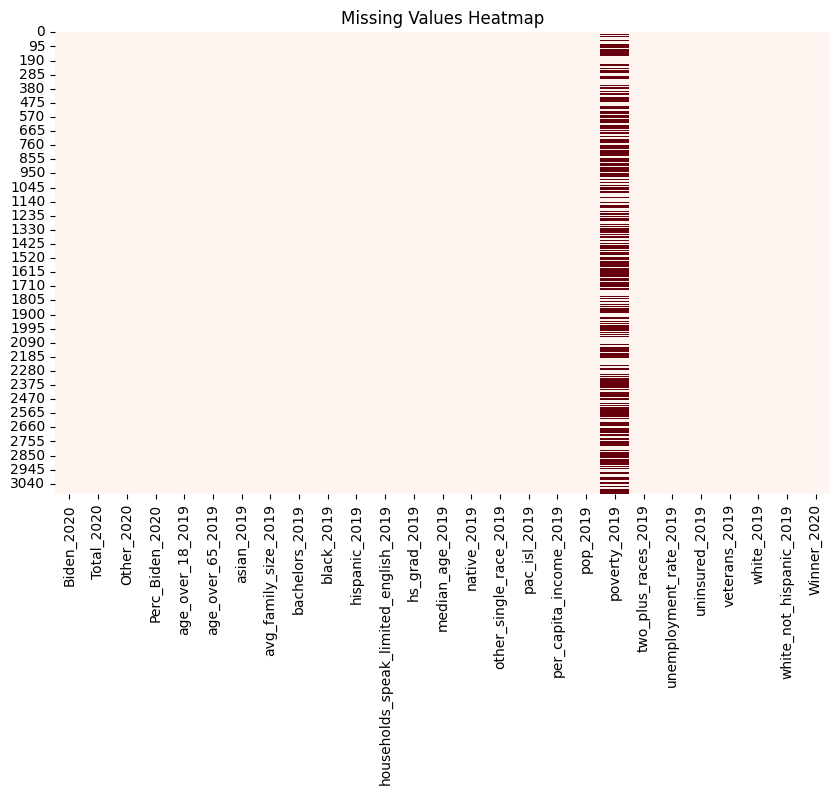

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize missing values with a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cbar=False, cmap="Reds")

plt.title("Missing Values Heatmap")
plt.show()

### Eliminar columnas 2

In [50]:
columns_to_drop = ['poverty_2019']  # Nombres de las columnas a eliminar
data = data.drop(columns=columns_to_drop)

### Tabla Final

In [51]:
# Usar tabulate para mostrar las primeras 5 filas en formato de tabla 
print(tabulate(data.head(), headers='keys', tablefmt='fancy_grid'))

╒════╤══════════════╤══════════════╤══════════════╤═══════════════════╤════════════════════╤════════════════════╤══════════════╤════════════════════════╤══════════════════╤══════════════╤═════════════════╤═════════════════════════════════════════╤════════════════╤═══════════════════╤═══════════════╤══════════════════════════╤════════════════╤══════════════════════════╤════════════╤═══════════════════════╤══════════════════════════╤══════════════════╤═════════════════╤══════════════╤═══════════════════════════╤═══════════════╕
│    │   Biden_2020 │   Total_2020 │   Other_2020 │   Perc_Biden_2020 │   age_over_18_2019 │   age_over_65_2019 │   asian_2019 │   avg_family_size_2019 │   bachelors_2019 │   black_2019 │   hispanic_2019 │   households_speak_limited_english_2019 │   hs_grad_2019 │   median_age_2019 │   native_2019 │   other_single_race_2019 │   pac_isl_2019 │   per_capita_income_2019 │   pop_2019 │   two_plus_races_2019 │   unemployment_rate_2019 │   uninsured_2019 │   veterans_20

### Correlación

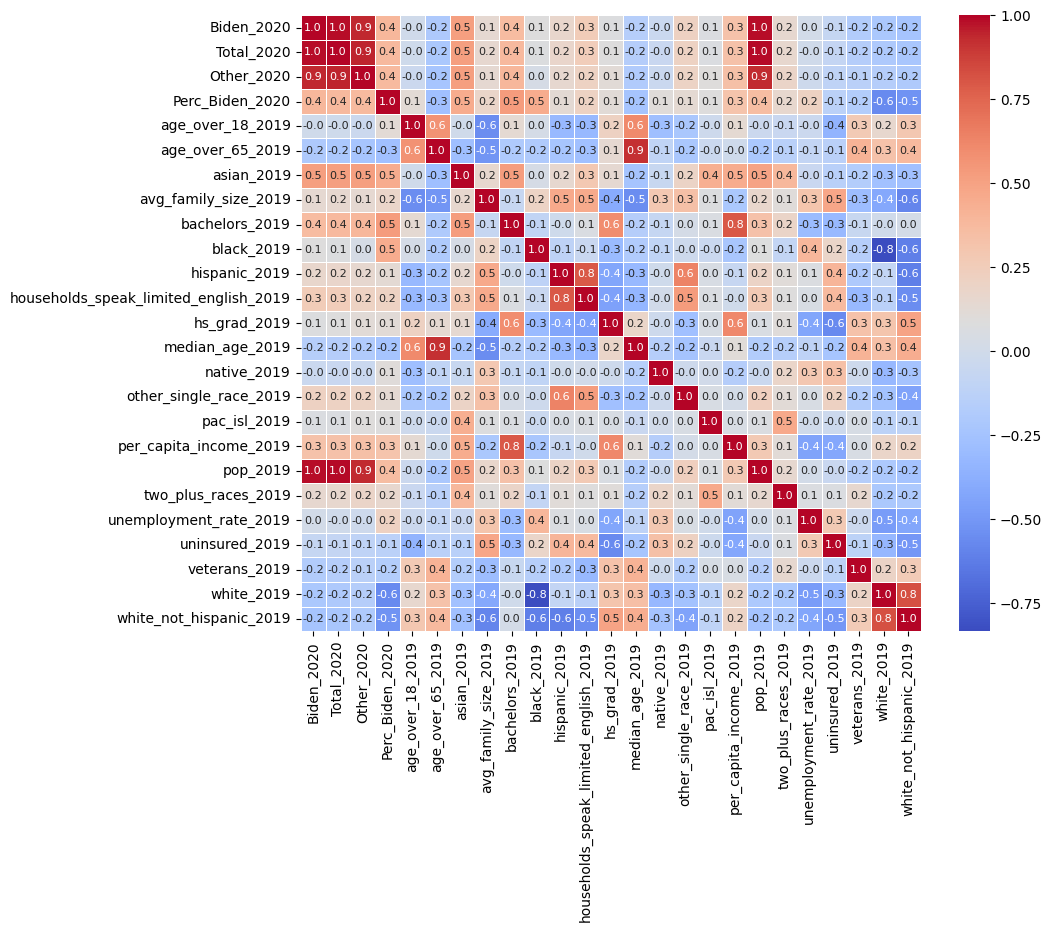

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la matriz de correlación sin la variable "Winner_2020"
corr_matrix = data.iloc[:, :-1].corr()

# Crear un mapa de calor de la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".1f", linewidths=0.5, annot_kws={"size": 8})

# Mostrar el gráfico
plt.show()


## Aprendizaje No Supervisado

### Dataset

In [59]:
columns_to_drop = ['Winner_2020']  # Nombres de las columnas a eliminar
data_unsupervised = data.drop(columns=columns_to_drop)

### PCA

### Clustering

#### KMeans

## Aprendizaje Supervisado

En esta sección, utilizaremos métodos de aprendizaje supervisado para abordar nuestros problemas de clasificación y regresión. Para la clasificación, aplicaremos Árboles de Decisión, Random Forest, KNN, LDA/QDA, y Naive Bayes, comparando su desempeño. En regresión, emplearemos Regresión Lineal y Regresión Logística, con enfoques de selección de variables hacia adelante y hacia atrás, evaluando la eficacia de cada método en función del problema a resolver.

### Clasificación

#### Dataset

In [60]:
columns_to_drop = ['Biden_2020', 'Total_2020', 'Other_2020', 'Perc_Biden_2020']  # Nombres de las columnas a eliminar
data_class = data.drop(columns=columns_to_drop)

#### Data Splitting

In [74]:
from sklearn.model_selection import train_test_split

# Quitar la columna objetivo ('Biden_2020') del conjunto de datos
X = data_class.drop(columns=["Winner_2020"])  # Características (sin la columna objetivo)
y = data_class["Winner_2020"]  # Columna objetivo

# Paso 1: Divide los datos en 80% para train+validation y 20% para test
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Paso 2: Divide el 80% en 70% para train y 30% para validation (70% de 80% = 56% del total original)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.3, random_state=42)

#### Benchmark Model

Winner_2020
Trump    0.838316
Biden    0.161684
Name: proportion, dtype: float64


C:\Users\jorge\AppData\Local\Temp\ipykernel_34656\3412080848.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_distribution_percentage.index, y=label_distribution_percentage.values, palette=["#e41a1c","#377eb8"])


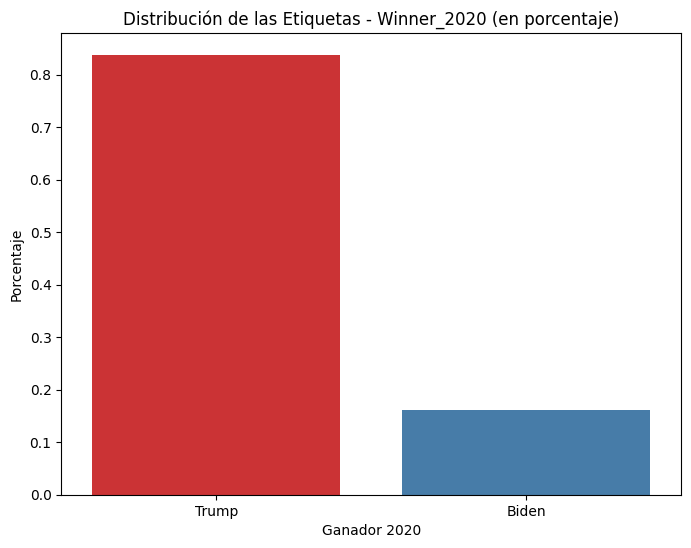

In [79]:
# Obtener la distribución de las etiquetas en porcentaje
label_distribution_percentage = data_class["Winner_2020"].value_counts(normalize=True)

# Imprimir la distribución en porcentaje
print(label_distribution_percentage)

# Graficar la distribución de las etiquetas en porcentaje
plt.figure(figsize=(8, 6))
sns.barplot(x=label_distribution_percentage.index, y=label_distribution_percentage.values, palette=["#e41a1c","#377eb8"])

# Añadir título y etiquetas
plt.title("Distribución de las Etiquetas - Winner_2020 (en porcentaje)")
plt.xlabel("Ganador 2020")
plt.ylabel("Porcentaje")

# Mostrar el gráfico
plt.show()


#### Decision Trees

#### Random Forest

#### KNN

#### Análisis Discriminante

#### Naïve Bayes

### Regresión

#### Dataset

In [68]:
columns_to_drop = ['Total_2020', 'Other_2020', 'Winner_2020', "Perc_Biden_2020"]  # Nombres de las columnas a eliminar
data_reg = data.drop(columns=columns_to_drop)
data_reg.head()

,Biden_2020,age_over_18_2019,age_over_65_2019,asian_2019,avg_family_size_2019,bachelors_2019,black_2019,hispanic_2019,households_speak_limited_english_2019,hs_grad_2019,...,other_single_race_2019,pac_isl_2019,per_capita_income_2019,pop_2019,two_plus_races_2019,unemployment_rate_2019,uninsured_2019,veterans_2019,white_2019,white_not_hispanic_2019
0,7503,76.2,15.0,1.0,3.09,26.6,19.0,2.8,0.7,88.5,...,0.7,0.0,29819,55380,2.2,3.5,7.1,12.6,76.8,74.6
1,24578,78.3,20.0,0.9,3.24,31.9,9.3,4.6,1.2,90.8,...,1.1,0.0,32626,212830,1.7,4.0,8.9,11.8,86.2,83.1
2,4816,79.1,18.6,0.5,3.01,11.6,47.6,4.4,1.6,73.2,...,3.6,0.0,18473,25361,1.2,9.4,11.3,6.6,46.8,45.8
3,1986,79.4,15.9,0.1,3.74,10.4,22.3,2.6,0.6,79.1,...,0.0,0.0,20778,22493,0.6,7.0,10.7,8.0,76.8,74.5
4,2640,76.8,17.9,0.4,3.33,13.1,1.6,9.3,1.8,80.5,...,0.9,0.0,24747,57681,1.6,3.1,10.8,7.7,95.5,86.9


#### Data Splitting

In [71]:
from sklearn.model_selection import train_test_split

# Quitar la columna objetivo ('Biden_2020') del conjunto de datos
X = data_reg.drop(columns=["Biden_2020"])  # Características (sin la columna objetivo)
y = data_reg["Biden_2020"]  # Columna objetivo

# Paso 1: Divide los datos en 80% para train+validation y 20% para test
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Paso 2: Divide el 80% en 70% para train y 30% para validation (70% de 80% = 56% del total original)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.3, random_state=42)

#### Benchmark Model

#### Multiple Regression

#### Logistic Regression

## Mapas

In [55]:
import plotly.express as px

# Create a choropleth map using Plotly Express
fig = px.choropleth(data_frame=data,
                    geojson='https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json',
                    locations='fips',
                    color='Biden_2020',
                    hover_name='county',  # Show county names in hover tooltip
                    hover_data=['Trump_2020', 'Biden_2020'],
                    scope='usa',
                    color_continuous_scale="Blues_R",  # Use the custom scale
                    labels={'Biden_2020': 'Biden Votes'}  # Label for the color bar
                   )

# Add titles
fig.update_layout(title_text="2020 US Presidential Election - Biden Votes",  # Plot title
                  title_x=0.5,  # Center the title
                  geo=dict(
                      showcoastlines=True,  # Show coastlines
                      coastlinecolor="Black"  # Set coastline color
                  )
                 )

# Customize geographic display
fig.update_geos(
    fitbounds="locations",  # Fit the map to the FIPS code locations
)

# Remove the boundary lines between counties
fig.update_traces(marker_line_width=0.5, marker_line_color="black") 



fig.show()



ValueError: Value of 'hover_name' is not the name of a column in 'data_frame'. Expected one of ['Biden_2020', 'Total_2020', 'Other_2020', 'Perc_Biden_2020', 'age_over_18_2019', 'age_over_65_2019', 'asian_2019', 'avg_family_size_2019', 'bachelors_2019', 'black_2019', 'hispanic_2019', 'households_speak_limited_english_2019', 'hs_grad_2019', 'median_age_2019', 'native_2019', 'other_single_race_2019', 'pac_isl_2019', 'per_capita_income_2019', 'pop_2019', 'two_plus_races_2019', 'unemployment_rate_2019', 'uninsured_2019', 'veterans_2019', 'white_2019', 'white_not_hispanic_2019', 'Winner_2020'] but received: county